In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('/Users/acrhonoz./Desktop/Hospitales1.xlsx',sheet_name= 'Base de datos')

In [3]:
df.head()

,ID,DIAS_ESTANCIA,EDAD,GENERO,PESO,ALTURA,MES,ENTIDAD,INDIGENA,MOTIVO_EGRESO,CODIGO_ENFERMEDAD
0,2738822,1,23,2,63,147.0,2,29,2,1,O809
1,2735411,2,22,2,84,NaN,6,8,2,1,O829
2,2731022,2,23,2,86,151.0,2,4,2,1,O809
3,2726593,0,67,2,45,152.0,3,20,2,1,H259
4,2723606,2,27,2,53,154.0,2,21,2,1,O064


In [5]:
df.shape

(29894, 11)

### 1) Análisis Exploratorio 
### Calcula los principales estadísticos de cada variable para conocer las características de cada una y entender la base, puedes apoyarte de gráficos

In [6]:
# El método describe() nos indica los estadísticos principales de cada variable de la base
# Para el campo ID los estadísiticos no significan algo
df.describe()

,ID,DIAS_ESTANCIA,EDAD,GENERO,PESO,ALTURA,MES,ENTIDAD,INDIGENA,MOTIVO_EGRESO
count,2.989400e+04,29894.000000,29894.000000,29894.000000,29894.000000,27000.000000,29894.000000,29894.000000,29894.000000,29894.000000
mean,1.386541e+06,3.356894,31.181709,1.722319,60.933164,147.625778,6.510771,16.487389,2.079715,2.141032
std,8.391312e+05,9.864152,19.768426,0.447863,23.678744,29.536231,3.405058,7.589933,0.880720,0.847314
min,3.600000e+01,0.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1.000000
25%,5.974330e+05,1.000000,19.000000,1.000000,54.000000,149.000000,4.000000,11.000000,2.000000,2.000000
50%,1.387373e+06,1.000000,26.000000,2.000000,65.000000,156.000000,7.000000,15.000000,2.000000,2.000000
75%,2.164698e+06,3.000000,41.000000,2.000000,75.000000,162.000000,9.000000,21.000000,2.000000,2.000000
max,2.739028e+06,550.000000,118.000000,2.000000,246.000000,214.000000,12.000000,32.000000,9.000000,9.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29894 entries, 0 to 29893
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 29894 non-null  int64  
 1   DIAS_ESTANCIA      29894 non-null  int64  
 2   EDAD               29894 non-null  int64  
 3   GENERO             29894 non-null  int64  
 4   PESO               29894 non-null  int64  
 5   ALTURA             27000 non-null  float64
 6   MES                29894 non-null  int64  
 7   ENTIDAD            29894 non-null  int64  
 8   INDIGENA           29894 non-null  int64  
 9   MOTIVO_EGRESO      29894 non-null  int64  
 10  CODIGO_ENFERMEDAD  29894 non-null  object 
dtypes: float64(1), int64(9), object(1)
memory usage: 2.5+ MB


In [10]:
# Contamos los registros que hay del genero entre hombres y mujeres
# Lo que nos indica que hay 8301 Masculinos y 21593 Femeninos
pd.value_counts(df['GENERO'])

2    21593
1     8301
Name: GENERO, dtype: int64

#### Estadisticos de Mujeres y todo su análisis

In [37]:
# Creamos una subconsulta que nos arroje los estadisticos por Género.
# Primeramente Obtenemos los estadisticos para las mujeres
filtro_mujer = df['GENERO'] == 2
df_mujeres = df[filtro_mujer]
nm = df_mujeres.shape[0]
print(f'Número de mujeres: {nm}')

Número de mujeres: 21593


In [20]:
campos_validos = ['DIAS_ESTANCIA','EDAD','PESO','ALTURA']
df_mujeres[campos_validos].describe()

,DIAS_ESTANCIA,EDAD,PESO,ALTURA
count,21593.000000,21593.000000,21593.000000,19529.000000
mean,2.767702,29.925068,63.286574,149.450817
std,9.270344,17.276553,20.828561,23.929315
min,0.000000,1.000000,1.000000,30.000000
25%,1.000000,19.000000,56.000000,150.000000
50%,1.000000,25.000000,65.000000,155.000000
75%,2.000000,36.000000,75.000000,160.000000
max,384.000000,118.000000,246.000000,214.000000


In [35]:
# Estadísticos de Mujeres que son indigenas 
fmi = (df['GENERO'] == 2) & (df['INDIGENA']== 1) 
df_mujeres_indigenas = df[fmi]
nmi = df_mujeres_indigenas.shape[0]
print(f'Número de mujeres indígeneas: {nmi}')

Número de mujeres indígeneas: 673


In [26]:
df_mujeres_indigenas[campos_validos].describe()

,DIAS_ESTANCIA,EDAD,PESO,ALTURA
count,673.000000,673.000000,673.000000,640.000000
mean,2.794948,29.632987,59.974740,147.653125
std,14.681424,14.837731,15.694089,16.438485
min,0.000000,1.000000,1.000000,36.000000
25%,1.000000,20.000000,54.000000,146.000000
50%,1.000000,26.000000,61.000000,150.000000
75%,2.000000,35.000000,68.000000,155.000000
max,366.000000,86.000000,145.000000,174.000000


In [38]:
# Estadísticos de mujeres NO Indígenas
fmni = (df['GENERO'] == 2) & (df['INDIGENA']== 2) 
df_mujeres_NO_indigenas = df[fmni]
nmni = df_mujeres_NO_indigenas.shape[0]
print(f'Número de mujeres NO indígeneas: {nmni}')

Número de mujeres NO indígeneas: 20613


In [39]:
df_mujeres_NO_indigenas[campos_validos].describe()

,DIAS_ESTANCIA,EDAD,PESO,ALTURA
count,20613.000000,20613.000000,20613.000000,18606.000000
mean,2.769805,29.956920,63.421191,149.508223
std,9.074729,17.378644,20.979111,24.139835
min,0.000000,1.000000,1.000000,30.000000
25%,1.000000,19.000000,56.000000,150.000000
50%,1.000000,25.000000,65.000000,155.000000
75%,2.000000,36.000000,75.000000,160.000000
max,384.000000,118.000000,246.000000,214.000000


In [42]:
# Estadísticos de mujeres con característica "Indigena" Desconocida
fmid = (df['GENERO'] == 2) & (df['INDIGENA']== 9) 
df_mujeres_indigenas_desconocida = df[fmid]
nmid = df_mujeres_indigenas_desconocida.shape[0]
print(f'Número de mujeres con caracterísitica "indigena" deconocido: {nmid}')

Número de mujeres con caracterísitica "indigena" deconocido: 307


In [43]:
df_mujeres_indigenas_desconocida[campos_validos].describe()

,DIAS_ESTANCIA,EDAD,PESO,ALTURA
count,307.000000,307.000000,307.000000,283.000000
mean,2.566775,28.426710,61.508143,149.742049
std,6.600005,15.218571,19.899644,24.219751
min,0.000000,1.000000,2.000000,41.000000
25%,1.000000,19.000000,54.000000,150.000000
50%,1.000000,25.000000,65.000000,155.000000
75%,2.000000,34.000000,74.000000,160.000000
max,100.000000,94.000000,140.000000,175.000000


In [52]:
summary_mujeres = {'Mujeres':nm,'Mujeres Indígenas': nmi, 'Mujeres NO Indigenas': nmni,
                  'Mujeres Indígenas Desc':nmid,
                  '%Mujeres Indígenas': (nmi/nm)*100,
                  '%Mujeres NO Indigenas': (nmni/nm)*100,
                  '%Mujeres Indígenas Desc': (nmid/nm)*100}
pd.DataFrame([summary_mujeres])

,Mujeres,Mujeres Indígenas,Mujeres NO Indigenas,Mujeres Indígenas Desc,%Mujeres Indígenas,%Mujeres NO Indigenas,%Mujeres Indígenas Desc
0,21593,673,20613,307,3.116751,95.461492,1.421757


#### Estadísiticos de hombres y todo su análisis

In [57]:
# Creamos la subconsulta para obtener los estadísticos de los hombres
filtro_hombres = df['GENERO'] == 1
df_hombres = df[filtro_hombres]
nh = df_hombres.shape[0]
print(f'Número de hombres: {nh}')

Número de hombres: 8301


In [23]:
df_hombres[campos_validos].describe()

,DIAS_ESTANCIA,EDAD,PESO,ALTURA
count,8301.000000,8301.000000,8301.000000,7471.000000
mean,4.889531,34.450548,54.811348,142.855173
std,11.118408,24.823092,28.963152,40.307691
min,0.000000,1.000000,1.000000,30.000000
25%,1.000000,11.000000,35.000000,136.000000
50%,2.000000,32.000000,63.000000,160.000000
75%,5.000000,55.000000,75.000000,168.000000
max,550.000000,118.000000,190.000000,195.000000


In [53]:
# Estadísticos de Hombres que son indigenas 
fhi = (df['GENERO'] == 1) & (df['INDIGENA']== 1) 
df_hombres_indigenas = df[fhi]
nhi = df_hombres_indigenas.shape[0]
print(f'Número de hombres indígeneas: {nhi}')

Número de hombres indígeneas: 164


In [54]:
df_hombres_indigenas[campos_validos].describe()

,DIAS_ESTANCIA,EDAD,PESO,ALTURA
count,164.000000,164.000000,164.000000,152.000000
mean,4.682927,37.579268,49.786585,135.815789
std,8.803064,25.521069,25.633989,41.417343
min,0.000000,1.000000,1.000000,34.000000
25%,1.000000,14.750000,34.750000,137.500000
50%,3.000000,37.500000,58.000000,157.000000
75%,6.000000,60.000000,68.000000,160.000000
max,102.000000,92.000000,90.000000,175.000000


In [55]:
# Estadísticos de hombres NO Indígenas
fhni = (df['GENERO'] == 1) & (df['INDIGENA']== 2) 
df_hombres_NO_indigenas = df[fhni]
nhni = df_hombres_NO_indigenas.shape[0]
print(f'Número de hombres NO indígeneas: {nhni}')

Número de hombres NO indígeneas: 7984


In [61]:
df_hombres_NO_indigenas[campos_validos].describe()

,DIAS_ESTANCIA,EDAD,PESO,ALTURA
count,7984.000000,7984.000000,7984.000000,7181.000000
mean,4.872370,34.389028,54.949900,142.994569
std,11.190587,24.815425,29.041569,40.290932
min,0.000000,1.000000,1.000000,30.000000
25%,1.000000,11.000000,35.000000,136.000000
50%,2.000000,32.000000,63.000000,160.000000
75%,5.000000,54.000000,75.000000,168.000000
max,550.000000,118.000000,190.000000,195.000000


In [59]:
# Estadísticos de hombres con característica "Indigena" Desconocida
fhid = (df['GENERO'] == 1) & (df['INDIGENA']== 9) 
df_hombres_indigenas_desconocida = df[fhid]
nhid = df_hombres_indigenas_desconocida.shape[0]
print(f'Número de hombres con caracterísitica "indigena" deconocido: {nhid}')

Número de hombres con caracterísitica "indigena" deconocido: 153


In [60]:
df_hombres_indigenas_desconocida[campos_validos].describe()

,DIAS_ESTANCIA,EDAD,PESO,ALTURA
count,153.000000,153.000000,153.000000,138.000000
mean,6.006536,34.307190,52.967320,143.355072
std,9.424560,24.409414,27.825447,39.535035
min,0.000000,1.000000,2.000000,42.000000
25%,0.000000,11.000000,28.000000,134.250000
50%,2.000000,29.000000,62.000000,160.000000
75%,8.000000,54.000000,73.000000,168.000000
max,61.000000,86.000000,116.000000,180.000000


In [62]:
summary_hombres = {'Hombres':nh,'Hombres Indígenas': nhi, 'Hombres NO Indigenas': nhni,
                  'Hombres Indígenas Desc':nhid,
                  '%Hombres Indígenas': (nhi/nh)*100,
                  '%Hombres NO Indigenas': (nhni/nh)*100,
                  '%Hombres Indígenas Desc': (nhid/nh)*100}
pd.DataFrame([summary_hombres])

,Hombres,Hombres Indígenas,Hombres NO Indigenas,Hombres Indígenas Desc,%Hombres Indígenas,%Hombres NO Indigenas,%Hombres Indígenas Desc
0,8301,164,7984,153,1.975666,96.181183,1.843151


#### Estadísticos sobre Entidad hospitalaria

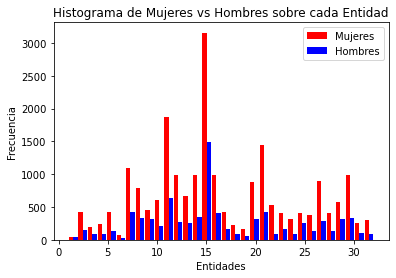

In [115]:
m = df_mujeres['ENTIDAD'].tolist()
h = df_hombres['ENTIDAD'].tolist()
plt.hist([m, h], bins = 32, rwidth = 0.90, color= ['r','b'],label=['Mujeres', 'Hombres'])
plt.title('Histograma de Mujeres vs Hombres sobre cada Entidad')
plt.xlabel('Entidades')
plt.ylabel('Frecuencia')
plt.legend(loc='upper right')
plt.show()

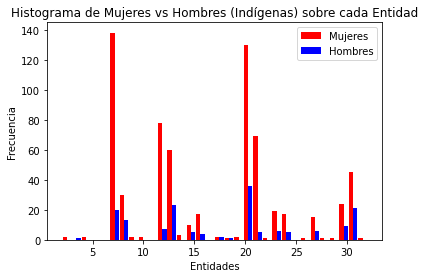

In [116]:
m = df_mujeres_indigenas['ENTIDAD'].tolist()
h = df_hombres_indigenas['ENTIDAD'].tolist()
plt.hist([m, h], bins = 32, rwidth = 0.90, color= ['r','b'],label=['Mujeres', 'Hombres'])
plt.title('Histograma de Mujeres vs Hombres (Indígenas) sobre cada Entidad')
plt.xlabel('Entidades')
plt.ylabel('Frecuencia')
plt.legend(loc='upper right')
plt.show()

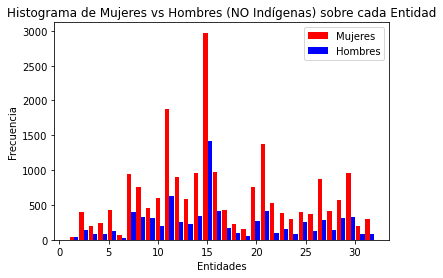

In [117]:
m = df_mujeres_NO_indigenas['ENTIDAD'].tolist()
h = df_hombres_NO_indigenas['ENTIDAD'].tolist()
plt.hist([m, h], bins = 32, rwidth = 0.90, color= ['r','b'],label=['Mujeres', 'Hombres'])
plt.title('Histograma de Mujeres vs Hombres (NO Indígenas) sobre cada Entidad')
plt.xlabel('Entidades')
plt.ylabel('Frecuencia')
plt.legend(loc='upper right')
plt.show()

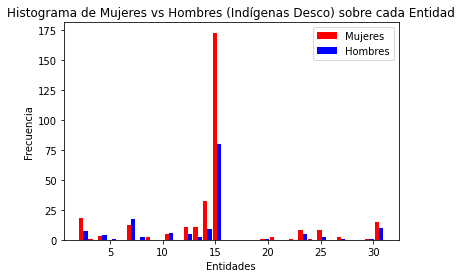

In [118]:
m = df_mujeres_indigenas_desconocida['ENTIDAD'].tolist()
h = df_hombres_indigenas_desconocida['ENTIDAD'].tolist()
plt.hist([m, h], bins = 32, rwidth = 0.90, color= ['r','b'],label=['Mujeres', 'Hombres'])
plt.title('Histograma de Mujeres vs Hombres (Indígenas Desco) sobre cada Entidad')
plt.xlabel('Entidades')
plt.ylabel('Frecuencia')
plt.legend(loc='upper right')
plt.show()

#### Estadísticos sobre Motivo de egreso

In [129]:
# Numero de egresos por cada categoría
pd.value_counts(df['MOTIVO_EGRESO'], sort = True)

2    26793
1     1285
7      540
5      503
4      429
3      327
9       13
6        4
Name: MOTIVO_EGRESO, dtype: int64

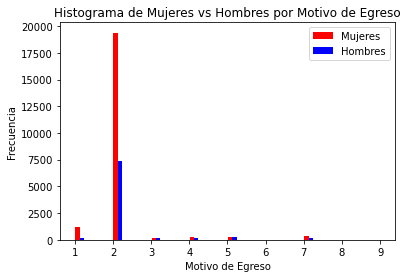

In [130]:
m = df_mujeres['MOTIVO_EGRESO'].tolist()
h = df_hombres['MOTIVO_EGRESO'].tolist()
plt.hist([m, h], bins = 32, rwidth = 0.90, color= ['r','b'],label=['Mujeres', 'Hombres'])
plt.title('Histograma de Mujeres vs Hombres por Motivo de Egreso')
plt.xlabel('Motivo de Egreso')
plt.ylabel('Frecuencia')
plt.legend(loc='upper right')
plt.show()

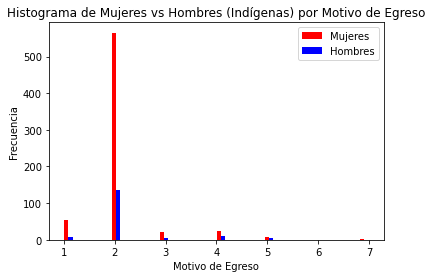

In [131]:
m = df_mujeres_indigenas['MOTIVO_EGRESO'].tolist()
h = df_hombres_indigenas['MOTIVO_EGRESO'].tolist()
plt.hist([m, h], bins = 32, rwidth = 0.90, color= ['r','b'],label=['Mujeres', 'Hombres'])
plt.title('Histograma de Mujeres vs Hombres (Indígenas) por Motivo de Egreso')
plt.xlabel('Motivo de Egreso')
plt.ylabel('Frecuencia')
plt.legend(loc='upper right')
plt.show()

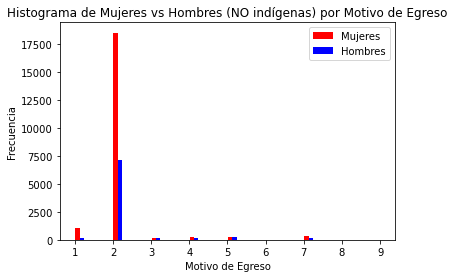

In [132]:
m = df_mujeres_NO_indigenas['MOTIVO_EGRESO'].tolist()
h = df_hombres_NO_indigenas['MOTIVO_EGRESO'].tolist()
plt.hist([m, h], bins = 32, rwidth = 0.90, color= ['r','b'],label=['Mujeres', 'Hombres'])
plt.title('Histograma de Mujeres vs Hombres (NO indígenas) por Motivo de Egreso')
plt.xlabel('Motivo de Egreso')
plt.ylabel('Frecuencia')
plt.legend(loc='upper right')
plt.show()

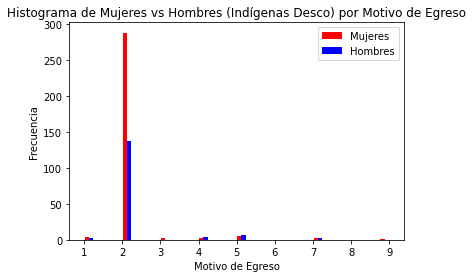

In [133]:
m = df_mujeres_indigenas_desconocida['MOTIVO_EGRESO'].tolist()
h = df_hombres_indigenas_desconocida['MOTIVO_EGRESO'].tolist()
plt.hist([m, h], bins = 32, rwidth = 0.90, color= ['r','b'],label=['Mujeres', 'Hombres'])
plt.title('Histograma de Mujeres vs Hombres (Indígenas Desco) por Motivo de Egreso')
plt.xlabel('Motivo de Egreso')
plt.ylabel('Frecuencia')
plt.legend(loc='upper right')
plt.show()

### 2) Tratamiento de los datos 

In [137]:
# Identifica outliers elimínalos o corrígelos
# Vemos que la única columna que tiene valores nulos es la de "Altura" ya que el total son 29,894
# y esa columna solo tiene 27,000 no nulos
df.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29894 entries, 0 to 29893
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 29894 non-null  int64  
 1   DIAS_ESTANCIA      29894 non-null  int64  
 2   EDAD               29894 non-null  int64  
 3   GENERO             29894 non-null  int64  
 4   PESO               29894 non-null  int64  
 5   ALTURA             27000 non-null  float64
 6   MES                29894 non-null  int64  
 7   ENTIDAD            29894 non-null  int64  
 8   INDIGENA           29894 non-null  int64  
 9   MOTIVO_EGRESO      29894 non-null  int64  
 10  CODIGO_ENFERMEDAD  29894 non-null  object 
dtypes: float64(1), int64(9), object(1)
memory usage: 2.5+ MB


In [138]:
# Muestra el numero de filas nulas por cada columna
df.isna().sum()

ID                      0
DIAS_ESTANCIA           0
EDAD                    0
GENERO                  0
PESO                    0
ALTURA               2894
MES                     0
ENTIDAD                 0
INDIGENA                0
MOTIVO_EGRESO           0
CODIGO_ENFERMEDAD       0
dtype: int64

In [139]:
# Creamos una copia del dataset cargado 
df1 = df.copy(deep= True)

In [143]:
# Sustituimos los valores vacíos de Altura por la media de la altura
df1['ALTURA'] = df1['ALTURA'].fillna(df1['ALTURA'].mean())

In [146]:
# Comprobamos que se haya ejecutado la sustitución correctamente
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29894 entries, 0 to 29893
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 29894 non-null  int64  
 1   DIAS_ESTANCIA      29894 non-null  int64  
 2   EDAD               29894 non-null  int64  
 3   GENERO             29894 non-null  int64  
 4   PESO               29894 non-null  int64  
 5   ALTURA             29894 non-null  float64
 6   MES                29894 non-null  int64  
 7   ENTIDAD            29894 non-null  int64  
 8   INDIGENA           29894 non-null  int64  
 9   MOTIVO_EGRESO      29894 non-null  int64  
 10  CODIGO_ENFERMEDAD  29894 non-null  object 
dtypes: float64(1), int64(9), object(1)
memory usage: 2.5+ MB


In [147]:
# Creamos la variable "TARGET" que me dice si depediendo su motivo de egreso es por mejoría o defunción

def func(row):
    if row['MOTIVO_EGRESO'] == 1:
        return 'CURACION'
    elif row['MOTIVO_EGRESO'] == 2:
        return 'MEJORIA' 
    elif row['MOTIVO_EGRESO'] == 3:
        return 'VOLUNTARIO' 
    elif row['MOTIVO_EGRESO'] == 4:
        return 'PASE_OTRO_HOSPITAL' 
    elif row['MOTIVO_EGRESO'] == 5:
        return 'DEFUNCION' 
    elif row['MOTIVO_EGRESO'] == 6:
        return 'FUGA' 
    elif row['MOTIVO_EGRESO'] == 7:
        return 'OTRO' 
    else:
        return 'NE'

df1['TARGET'] = df1.apply(func, axis=1)

In [151]:
df1

,ID,DIAS_ESTANCIA,EDAD,GENERO,PESO,ALTURA,MES,ENTIDAD,INDIGENA,MOTIVO_EGRESO,CODIGO_ENFERMEDAD,TARGET
0,2738822,1,23,2,63,147.000000,2,29,2,1,O809,CURACION
1,2735411,2,22,2,84,147.625778,6,8,2,1,O829,CURACION
2,2731022,2,23,2,86,151.000000,2,4,2,1,O809,CURACION
3,2726593,0,67,2,45,152.000000,3,20,2,1,H259,CURACION
4,2723606,2,27,2,53,154.000000,2,21,2,1,O064,CURACION
...,...,...,...,...,...,...,...,...,...,...,...,...
29889,625419,0,28,1,70,160.000000,8,15,2,9,N189,NE
29890,616410,0,51,2,70,160.000000,8,15,2,9,N189,NE
29891,356322,3,41,2,50,140.000000,12,9,2,9,D259,NE
29892,356309,3,27,2,88,154.000000,12,9,2,9,O829,NE


In [167]:
# Importo la tabla de las entidades como dataframe
df_entidades = pd.read_excel("/Users/acrhonoz./Desktop/Hospitales2.xlsx", sheet_name='Entidad')

In [169]:
df_entidades

,ENTIDAD,NOMBRE_ENTIDAD
0,1,Aguascalientes
1,2,Baja California
2,3,Baja California Sur
3,4,Campeche
4,5,Coahuila de Zaragoza
5,6,Colima
6,7,Chiapas
7,8,Chihuahua
8,9,CDMX
9,10,Durango


In [170]:
# Importo la tabla de las enfermedades como dataframe
df_enfermedades = pd.read_excel("/Users/acrhonoz./Desktop/Hospitales2.xlsx", sheet_name='Enfermedades')

In [171]:
df_enfermedades

,CODIGO_ENFERMEDAD,CODIGO_ENFERMEDAD_DESC
0,A000,"Cólera debido a Vibrio cholerae 01, biotipo ch..."
1,A001,"Cólera debido a Vibrio cholerae 01, biotipo el..."
2,A009,"Cólera, no especificado"
3,A010,Fiebre tifoidea
4,A011,Fiebre paratifoidea A
...,...,...
12638,Z993,Dependencia de silla de ruedas
12639,Z994,Dependencia de corazón artificial
12640,Z998,Dependencia de otras máquinas y dispositivos c...
12641,Z999,Dependencia de máquina y dispositivo capacitan...


In [176]:
# Creamos el cruce con la base entidades y agregamos el campo "NOMBRE_ENTIDAD"
df1_enti = pd.merge(df1,df_entidades,on='ENTIDAD',how='left')

In [177]:
df1_enti

,ID,DIAS_ESTANCIA,EDAD,GENERO,PESO,ALTURA,MES,ENTIDAD,INDIGENA,MOTIVO_EGRESO,CODIGO_ENFERMEDAD,TARGET,NOMBRE_ENTIDAD
0,2738822,1,23,2,63,147.000000,2,29,2,1,O809,CURACION,Tlaxcala
1,2735411,2,22,2,84,147.625778,6,8,2,1,O829,CURACION,Chihuahua
2,2731022,2,23,2,86,151.000000,2,4,2,1,O809,CURACION,Campeche
3,2726593,0,67,2,45,152.000000,3,20,2,1,H259,CURACION,Oaxaca
4,2723606,2,27,2,53,154.000000,2,21,2,1,O064,CURACION,Puebla
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29889,625419,0,28,1,70,160.000000,8,15,2,9,N189,NE,Mexico
29890,616410,0,51,2,70,160.000000,8,15,2,9,N189,NE,Mexico
29891,356322,3,41,2,50,140.000000,12,9,2,9,D259,NE,CDMX
29892,356309,3,27,2,88,154.000000,12,9,2,9,O829,NE,CDMX


In [178]:
# Del df anterior creamos el cruce con la base de codigo de enfermedad y nos traemos ese campo
df1_enti_enfer = pd.merge(df1_enti,df_enfermedades,on='CODIGO_ENFERMEDAD',how='left')

In [181]:
df1_enti_enfer.head()

,ID,DIAS_ESTANCIA,EDAD,GENERO,PESO,ALTURA,MES,ENTIDAD,INDIGENA,MOTIVO_EGRESO,CODIGO_ENFERMEDAD,TARGET,NOMBRE_ENTIDAD,CODIGO_ENFERMEDAD_DESC
0,2738822,1,23,2,63,147.000000,2,29,2,1,O809,CURACION,Tlaxcala,"Parto único espontáneo, sin otra especificación"
1,2735411,2,22,2,84,147.625778,6,8,2,1,O829,CURACION,Chihuahua,"Parto por cesárea, sin otra especificación"
2,2731022,2,23,2,86,151.000000,2,4,2,1,O809,CURACION,Campeche,"Parto único espontáneo, sin otra especificación"
3,2726593,0,67,2,45,152.000000,3,20,2,1,H259,CURACION,Oaxaca,"Catarata senil, no especificada"
4,2723606,2,27,2,53,154.000000,2,21,2,1,O064,CURACION,Puebla,"Aborto no especificado incompleto, sin complic..."


## 3) Análisis de Resultados

¿Qúe características tienen los egresos hospitalarios?
Viendo los histograma del ejercicio 1 sobre egresos, se observa un mayor numero de egresos tanto de hombres como de mujeres por curación.   

¿Qué factores pueden hacer que una persona dure más tiempo hospitalizada?

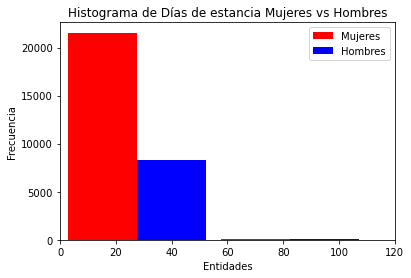

In [191]:
m = df_mujeres['DIAS_ESTANCIA'].tolist()
h = df_hombres['DIAS_ESTANCIA'].tolist()
plt.hist([m, h], bins = 10, rwidth = 0.90, color= ['r','b'],label=['Mujeres', 'Hombres'])
plt.title('Histograma de Días de estancia Mujeres vs Hombres')
plt.xlabel('Entidades')
plt.ylabel('Frecuencia')
plt.legend(loc='upper right')
plt.xlim(0,120)
plt.show()

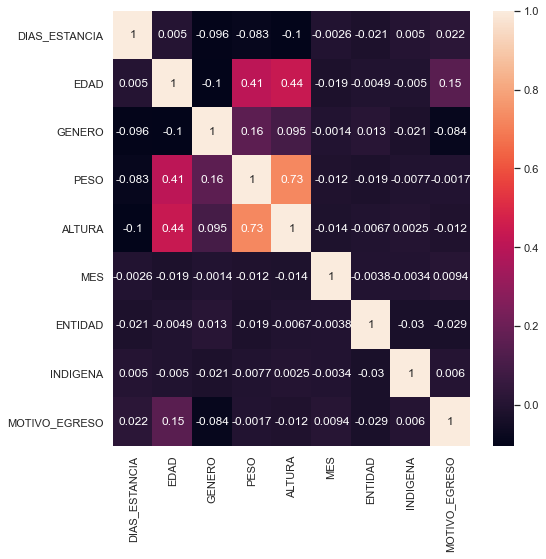

In [233]:
# Creamos la matriz de correlación junto con un heatmap
import seaborn as sns
predictores = ['DIAS_ESTANCIA', 'EDAD','GENERO','PESO','ALTURA', 'MES','ENTIDAD','INDIGENA','MOTIVO_EGRESO']
mat_corr = df1_enti_enfer[predictores].corr()
sns.set(rc = {'figure.figsize':(8,8)})
sns.heatmap(mat_corr, annot = True)

In [204]:
# Como la matriz de correlación muestra, vemos que las 2 variables que se relacionan con respecto a los días de 
# estancia médica son Altura, Peso
mx = df_mujeres['ALTURA'].tolist()
my = df_mujeres['DIAS_ESTANCIA'].tolist()
mx1 = df_mujeres['PESO'].tolist()
my1 = df_mujeres['DIAS_ESTANCIA'].tolist()

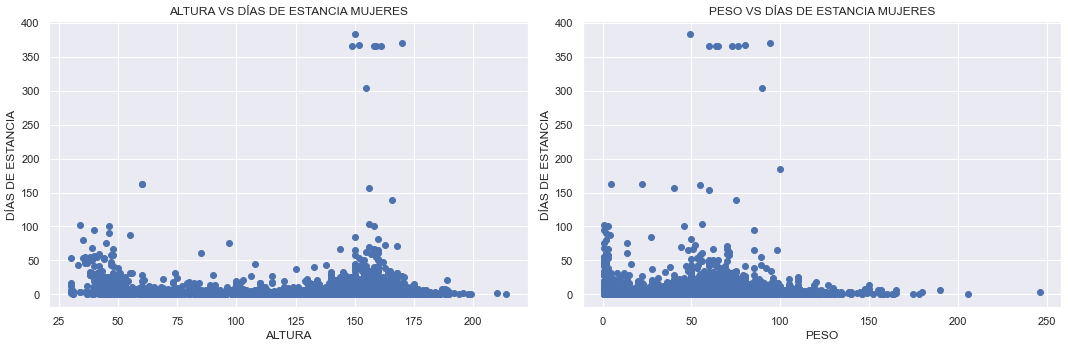

In [223]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(mx,my,marker= 'o')
plt.title('ALTURA VS DÍAS DE ESTANCIA MUJERES')
plt.xlabel('ALTURA')
plt.ylabel('DÍAS DE ESTANCIA')

plt.subplot(1, 2, 2)
plt.scatter(mx1,my1,marker= 'o')
plt.title('PESO VS DÍAS DE ESTANCIA MUJERES')
plt.xlabel('PESO')
plt.ylabel('DÍAS DE ESTANCIA')

plt.tight_layout()
plt.show()

In [214]:
# Hacemos lo mismo para los hombres
hx = df_hombres['ALTURA'].tolist()
hy = df_hombres['DIAS_ESTANCIA'].tolist()
hx1 = df_hombres['PESO'].tolist()
hy1 = df_hombres['DIAS_ESTANCIA'].tolist()

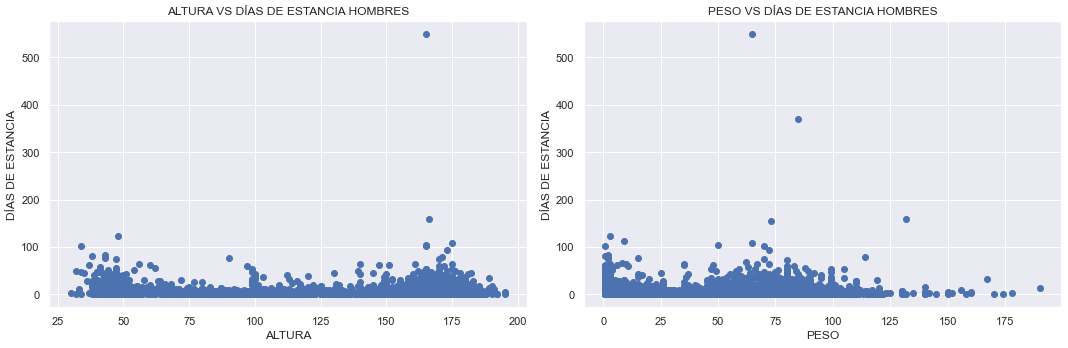

In [221]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(hx,hy,marker= 'o')
plt.title('ALTURA VS DÍAS DE ESTANCIA HOMBRES')
plt.xlabel('ALTURA')
plt.ylabel('DÍAS DE ESTANCIA')

plt.subplot(1, 2, 2)
plt.scatter(hx1,hy1,marker= 'o')
plt.title('PESO VS DÍAS DE ESTANCIA HOMBRES')
plt.xlabel('PESO')
plt.ylabel('DÍAS DE ESTANCIA')

plt.tight_layout()
plt.show()

## 4) Modelado de datos

In [228]:
# Importamos las librerías para crear los modelos y la seleción de training y test
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [225]:
# Separo lo datos en características y etiquetas
caracteristicas = ['DIAS_ESTANCIA', 'EDAD','GENERO', 'PESO', 'ALTURA','ENTIDAD']
etiquetas = ['MOTIVO_EGRESO']
X = df1_enti_enfer[caracteristicas] 
y = df1_enti_enfer[etiquetas]

In [226]:
#Separo los datos de en train y test de forma aleatoria 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True)
print('Son {} datos para entrenamiento y {} datos para prueba'.format(X_train.shape[0], X_test.shape[0]))

Son 23915 datos para entrenamiento y 5979 datos para prueba


In [236]:
# Creo el Modelo de Vecinos más Cercanos
algoritmo = KNeighborsClassifier(n_neighbors=5)
algoritmo.fit(X_train, y_train)
Y_pred = algoritmo.predict(X_test)
print('Precisión Vecinos más Cercanos: {}'.format(algoritmo.score(X_train, y_train)))

Precisión Vecinos más Cercanos: 0.9000627221409158


In [230]:
# Creo el Modelo de Árboles de Decisión Clasificación
algoritmo = DecisionTreeClassifier()
algoritmo.fit(X_train, y_train)
Y_pred = algoritmo.predict(X_test)
print('Precisión Árboles de Decisión Clasificación: {}'.format(algoritmo.score(X_train, y_train)))

Precisión Árboles de Decisión Clasificación: 0.9984528538574117


#### El algoritmo de árboles de decisión tiene una precisión más elevada que el el de k vecinos cercanos. 